In [1]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.65))
model.add(layers.Dense(128, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(33, activation='softmax'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)      

In [2]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "/home/asus/Desktop/Dataset_splits/train"
validation_dir = "/home/asus/Desktop/Dataset_splits/validation"

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical') 


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical')

Found 22110 images belonging to 33 classes.
Found 4132 images belonging to 33 classes.


In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=43)

Epoch 1/80
100/100 [==============================] - 187s 2s/step - loss: 3.0044 - acc: 0.1814 - val_loss: 2.5540 - val_acc: 0.3092
Epoch 2/80
100/100 [==============================] - 178s 2s/step - loss: 2.1460 - acc: 0.4029 - val_loss: 1.8138 - val_acc: 0.4570
Epoch 3/80
100/100 [==============================] - 170s 2s/step - loss: 1.8605 - acc: 0.4906 - val_loss: 1.8710 - val_acc: 0.5422
Epoch 4/80
100/100 [==============================] - 177s 2s/step - loss: 1.6286 - acc: 0.5580 - val_loss: 1.6884 - val_acc: 0.6098
Epoch 5/80
100/100 [==============================] - 172s 2s/step - loss: 1.5755 - acc: 0.5773 - val_loss: 1.5777 - val_acc: 0.6032
Epoch 6/80
100/100 [==============================] - 172s 2s/step - loss: 1.4906 - acc: 0.6039 - val_loss: 1.4258 - val_acc: 0.6137
Epoch 7/80
100/100 [==============================] - 179s 2s/step - loss: 1.4182 - acc: 0.6317 - val_loss: 1.3737 - val_acc: 0.6443
Epoch 8/80
100/100 [==============================] - 170s 2s/step - 

In [5]:
model.save('anugraymodel.h5') 

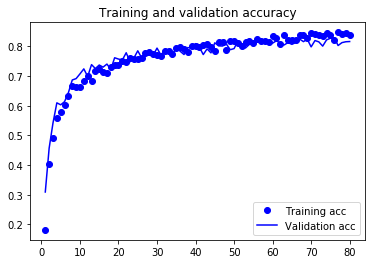

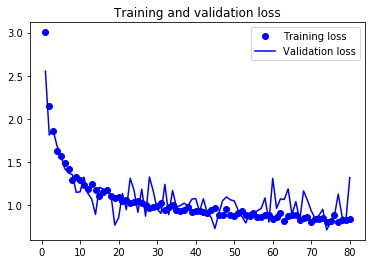

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [8]:
test_dir = "/home/asus/Desktop/Dataset_splits/test"

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')

Found 1369 images belonging to 33 classes.


In [9]:
score = model.evaluate_generator(test_generator, steps=40, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [10]:
print(score)

[0.6590663194656372, 0.8453124761581421]
